In [9]:
import sys;sys.path.append("..")
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [10]:
from devml import (mkdata, stats, state, fetch_repo, ts)

In [11]:
dest, token, org = state.get_project_metadata("../project/config.json")

In [12]:
#%%bash --out output --err error
fetch_repo.clone_org_repos(token, org, 
        dest, branch="master")

2017-10-14 21:47:01,649 - devml - INFO - Creating Checkout Root:  /tmp/checkout
2017-10-14 21:47:02,438 - devml - INFO - Found Repo # 1 REPO NAME: flask , URL: git@github.com:pallets/flask.git 
2017-10-14 21:47:02,439 - devml - INFO - Found Repo # 2 REPO NAME: pallets-sphinx-themes , URL: git@github.com:pallets/pallets-sphinx-themes.git 
2017-10-14 21:47:02,440 - devml - INFO - Found Repo # 3 REPO NAME: markupsafe , URL: git@github.com:pallets/markupsafe.git 
2017-10-14 21:47:02,440 - devml - INFO - Found Repo # 4 REPO NAME: jinja , URL: git@github.com:pallets/jinja.git 
2017-10-14 21:47:02,441 - devml - INFO - Found Repo # 5 REPO NAME: werkzeug , URL: git@github.com:pallets/werkzeug.git 
2017-10-14 21:47:02,442 - devml - INFO - Found Repo # 6 REPO NAME: itsdangerous , URL: git@github.com:pallets/itsdangerous.git 
2017-10-14 21:47:02,443 - devml - INFO - Found Repo # 7 REPO NAME: flask-website , URL: git@github.com:pallets/flask-website.git 
2017-10-14 21:47:02,443 - devml - INFO - Fou

[<git.Repo "/tmp/checkout/flask/.git">,
 <git.Repo "/tmp/checkout/pallets-sphinx-themes/.git">,
 <git.Repo "/tmp/checkout/markupsafe/.git">,
 <git.Repo "/tmp/checkout/jinja/.git">,
 <git.Repo "/tmp/checkout/werkzeug/.git">,
 <git.Repo "/tmp/checkout/itsdangerous/.git">,
 <git.Repo "/tmp/checkout/flask-website/.git">,
 <git.Repo "/tmp/checkout/click/.git">,
 <git.Repo "/tmp/checkout/flask-snippets/.git">,
 <git.Repo "/tmp/checkout/flask-docs/.git">,
 <git.Repo "/tmp/checkout/flask-ext-migrate/.git">,
 <git.Repo "/tmp/checkout/pocoo-sphinx-themes/.git">,
 <git.Repo "/tmp/checkout/website/.git">,
 <git.Repo "/tmp/checkout/meta/.git">]

In [13]:
!ls -l /tmp/checkout

total 0
drwxr-xr-x  21 noahgift  wheel  672 Oct 14 21:47 click
drwxr-xr-x  25 noahgift  wheel  800 Oct 14 21:47 flask
drwxr-xr-x  11 noahgift  wheel  352 Oct 14 21:47 flask-docs
drwxr-xr-x  12 noahgift  wheel  384 Oct 14 21:47 flask-ext-migrate
drwxr-xr-x   8 noahgift  wheel  256 Oct 14 21:47 flask-snippets
drwxr-xr-x  14 noahgift  wheel  448 Oct 14 21:47 flask-website
drwxr-xr-x  18 noahgift  wheel  576 Oct 14 21:47 itsdangerous
drwxr-xr-x  23 noahgift  wheel  736 Oct 14 21:47 jinja
drwxr-xr-x  18 noahgift  wheel  576 Oct 14 21:47 markupsafe
drwxr-xr-x   4 noahgift  wheel  128 Oct 14 21:47 meta
drwxr-xr-x  10 noahgift  wheel  320 Oct 14 21:47 pallets-sphinx-themes
drwxr-xr-x   9 noahgift  wheel  288 Oct 14 21:47 pocoo-sphinx-themes
drwxr-xr-x  15 noahgift  wheel  480 Oct 14 21:47 website
drwxr-xr-x  25 noahgift  wheel  800 Oct 14 21:47 werkzeug


In [5]:
#%%bash --out output --err error
df = mkdata.create_org_df(path="/tmp/checkout")

2017-10-14 21:35:18,252 - devml.mkdata - INFO - Found repo: /tmp/checkout/flask
2017-10-14 21:35:18,254 - devml.mkdata - INFO - Processing Repo: /tmp/checkout/flask
2017-10-14 21:35:18,273 - devml.mkdata - INFO - Repo Name: b'flask'
2017-10-14 21:35:18,342 - devml.mkdata - INFO - Found 3094 Messages For Repo: b'flask'
2017-10-14 21:35:18,343 - devml.mkdata - INFO - Found repo: /tmp/checkout/markupsafe
2017-10-14 21:35:18,343 - devml.mkdata - INFO - Processing Repo: /tmp/checkout/markupsafe
2017-10-14 21:35:18,359 - devml.mkdata - INFO - Repo Name: b'markupsafe'
2017-10-14 21:35:18,378 - devml.mkdata - INFO - Found 97 Messages For Repo: b'markupsafe'
2017-10-14 21:35:18,380 - devml.mkdata - INFO - Found repo: /tmp/checkout/jinja
2017-10-14 21:35:18,382 - devml.mkdata - INFO - Processing Repo: /tmp/checkout/jinja
2017-10-14 21:35:18,400 - devml.mkdata - INFO - Repo Name: b'jinja'
2017-10-14 21:35:18,451 - devml.mkdata - INFO - Found 1758 Messages For Repo: b'jinja'
2017-10-14 21:35:18,45

In [6]:
df.head()

,author_email,author_name,id,message,repo,commits
date,,,,,,
2017-10-13 04:53:50,rgerganov@gmail.com,Radoslav Gerganov,9291ead32e2fc8b13cef825186c968944e9ff344,Fix typo in logging.rst (#2492),b'flask',1
2017-10-11 07:03:32,davidism@gmail.com,David Lord,82e66848e8ab44d58e483b6b92eea5f04627c422,Merge pull request #2491 from mrnom/patch-1,b'flask',1
2017-10-11 06:47:26,31620258+mrnom@users.noreply.github.com,Mrn Om,c3527144780772a22effd718654ca6ad472aaae0,Fix grammar/typos,b'flask',1
2017-10-10 11:59:28,davidism@gmail.com,David Lord,0932d8f428ae6c7cb6615a6a146e417eb182ec4d,Merge pull request #2490 from davidism/cli-review,b'flask',1
2017-10-10 11:10:20,davidism@gmail.com,David Lord,9bc329c0c9dcdb5a3a6919f31542b6e7453d8aa8,rewrite cli docs reflects the current FLASK_AP...,b'flask',1


In [7]:
df_author_ud = stats.author_unique_active_days(df)

In [8]:
df_author_ud.head(10)

,author_name,active_days,active_duration,active_ratio
86,Armin Ronacher,989,3817 days,0.26
501,Markus Unterwaditzer,342,1820 days,0.19
216,David Lord,129,712 days,0.18
664,Ron DuPlain,78,854 days,0.09
444,Kenneth Reitz,68,2566 days,0.03
197,Daniel Neuhäuser,42,1457 days,0.03
297,Georg Brandl,41,1337 days,0.03
196,Daniel Neuhäuser,36,435 days,0.08
450,Keyan Pishdadian,28,885 days,0.03
169,Christopher Grebs,28,1515 days,0.02


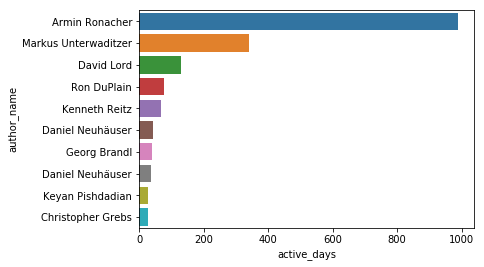

In [9]:
sns.barplot(y="author_name", x="active_days", data=df_author_ud.head(10))

In [8]:
df_author_ud['active_days_percentage'] = df_author_ud["active_duration"]/df_author_ud["active_days"]

In [10]:
ad = stats.author_active_days(df)

In [11]:
v = ad.loc["Markus Unterwaditzer"]

In [12]:
len(v)
#v.drop_duplicates

989

In [13]:
v.drop_duplicates(inplace=True)
v.dropna(inplace=True)

In [14]:
v.sort_values(axis=0,inplace=True)

In [27]:
vals = v

In [28]:
vals[0]-vals[len(vals)-1]

datetime.timedelta(206)

In [29]:
vals.count()

342

In [30]:
vals.reset_index(inplace=True,drop=True)

In [31]:
vals

0      2012-10-16
1      2012-10-21
2      2012-11-08
3      2012-12-10
4      2012-12-17
5      2013-01-16
6      2013-01-17
7      2013-01-18
8      2013-01-24
9      2013-02-17
10     2013-03-04
11     2013-03-05
12     2013-03-10
13     2013-03-11
14     2013-03-13
15     2013-03-14
16     2013-03-16
17     2013-03-17
18     2013-03-23
19     2013-04-15
20     2013-04-16
21     2013-04-17
22     2013-04-18
23     2013-05-17
24     2013-05-18
25     2013-05-19
26     2013-05-20
27     2013-05-21
28     2013-05-22
29     2013-05-23
          ...    
312    2017-01-26
313    2017-01-27
314    2017-02-09
315    2017-02-11
316    2017-02-13
317    2017-02-18
318    2017-02-25
319    2017-02-26
320    2017-02-27
321    2017-03-10
322    2017-03-11
323    2017-03-12
324    2017-03-15
325    2017-03-22
326    2017-03-29
327    2017-03-30
328    2017-03-31
329    2017-04-01
330    2017-04-16
331    2017-05-04
332    2017-05-05
333    2017-05-15
334    2017-05-16
335    2017-05-19
336    201

In [33]:
vals[len(vals)-1]-vals[0]

datetime.timedelta(1820)

In [19]:
round(df_author_ud["active_days"]/df_author_ud["active_duration"].dt.days, 2)

86     0.260000
501    0.190000
216    0.180000
664    0.090000
444    0.030000
197    0.030000
297    0.030000
196    0.080000
450    0.030000
169    0.020000
666    0.010000
712    0.030000
372    0.020000
427    0.440000
21     0.010000
569    0.070000
912    0.020000
756    0.010000
763    0.010000
628    0.010000
23     0.020000
391    0.000000
692    0.030000
460    0.030000
45     0.170000
185    0.020000
47     0.010000
380    0.010000
878    0.080000
519    0.010000
         ...   
425         inf
429         inf
430         inf
431         inf
397         inf
396         inf
395         inf
394         inf
360         inf
362         inf
363         inf
365         inf
366         inf
367         inf
368         inf
369         inf
370         inf
371         inf
373         inf
377         inf
379         inf
383         inf
384         inf
385         inf
386         inf
388         inf
389         inf
390         inf
393         inf
991         inf
Length: 991, dtype: floa

In [13]:
vv = df_author_ud["active_days"]

In [17]:
xx = df_author_ud["active_duration"].dt.days

In [18]:
vv/xx

86     0.259104
501    0.187912
216    0.181180
664    0.091335
444    0.026500
197    0.028826
297    0.030666
196    0.082759
450    0.031638
169    0.018482
666    0.008824
712    0.027743
372    0.022619
427    0.444444
21     0.008269
569    0.071066
912    0.020231
756    0.009324
763    0.007051
628    0.006382
23     0.019194
391    0.003268
692    0.034749
460    0.029520
45     0.173913
185    0.019753
47     0.013356
380    0.010191
878    0.081633
519    0.008197
         ...   
425         inf
429         inf
430         inf
431         inf
397         inf
396         inf
395         inf
394         inf
360         inf
362         inf
363         inf
365         inf
366         inf
367         inf
368         inf
369         inf
370         inf
371         inf
373         inf
377         inf
379         inf
383         inf
384         inf
385         inf
386         inf
388         inf
389         inf
390         inf
393         inf
991         inf
Length: 991, dtype: floa